In [1]:
x=1

In [12]:
import scanpy as sc
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib

# Some plotting aesthetics
%matplotlib inline

# sns.set_style('ticks')
matplotlib.rcParams['figure.figsize'] = [4, 4]
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
hlca = sc.read('../../../../snakemake/hlca/5fold/hlca_hyperparam/data/pp/hlca_hvg_pearson.h5ad')
hlca

AnnData object with n_obs × n_vars = 2149684 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_l

In [4]:
sc.pp.normalize_total(hlca, target_sum=1e4)

In [5]:
sc.pp.log1p(hlca)

In [6]:
hlca.var_names

Index(['ENSG00000175899', 'ENSG00000179869', 'ENSG00000167972',
       'ENSG00000154262', 'ENSG00000141338', 'ENSG00000085563',
       'ENSG00000006071', 'ENSG00000154175', 'ENSG00000099204',
       'ENSG00000072818',
       ...
       'ENSG00000283056', 'ENSG00000004838', 'ENSG00000130844',
       'ENSG00000151789', 'ENSG00000176083', 'ENSG00000174255',
       'ENSG00000124203', 'ENSG00000187498', 'ENSG00000157554',
       'ENSG00000159167'],
      dtype='object', name='ensembl_id', length=2000)

In [7]:
ipf_genes = {
    'BST2': 'ENSG00000130303', #
    'CMPK2': 'ENSG00000134326',
    'EIF2AK2': 'ENSG00000055332',
    'EPSTI1': 'ENSG00000133106',
    'HERC5': 'ENSG00000138646',
    'IFI35': 'ENSG00000068079',
    'IFI44L': 'ENSG00000137959',
    'IFI6': 'ENSG00000126709', #
    'IFIT3': 'ENSG00000119917', #
    'ISG15': 'ENSG00000187608', #
    'LY6E': 'ENSG00000160932',
    'MX1': 'ENSG00000157601',
    'MX2': 'ENSG00000183486',
    'OAS1': 'ENSG00000089127',
    'OAS2': 'ENSG00000111335',
    'PARP9': 'ENSG00000138496',
    'PLSCR1': 'ENSG00000188313',
    'SAMD9': 'ENSG00000205413',
    'SAMD9L': 'ENSG00000177409',
    'SP110': 'ENSG00000135899',
    'STAT1': 'ENSG00000115415',
    'TRIM22': 'ENSG00000132274',
    'UBE2L6': 'ENSG00000156587',
    'XAF1': 'ENSG00000132530',
    'IRF7': 'ENSG00000185507',
}

In [10]:
adata = sc.read('../../../pipeline/data/analysis/hlca_healthy_ipf_embed_balanced/adata.h5ad')
adata

AnnData object with n_obs × n_vars = 450214 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_leve

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


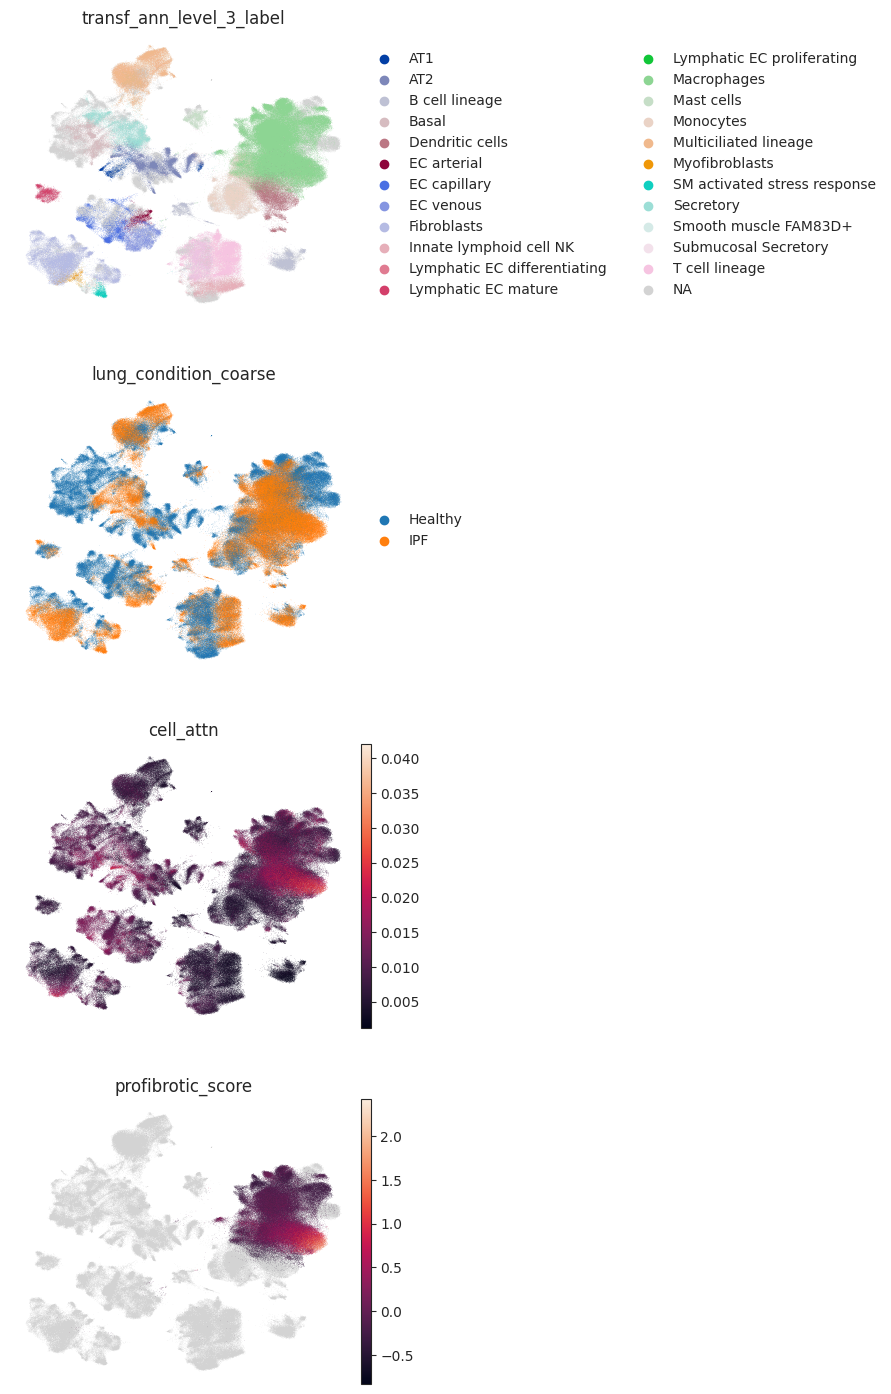

In [13]:
sc.pl.umap(
    adata,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'profibrotic_score'],
    ncols=1,
    frameon=False
)

In [23]:
adata_subset = hlca[adata[adata.obs['transf_ann_level_1_label'].isin(['Stroma', 'Epithelial'])].obs_names].copy()
adata_subset.obs['cell_attn'] = adata[adata_subset.obs_names].obs['cell_attn']
adata_subset

AnnData object with n_obs × n_vars = 97570 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [26]:
set(ipf_genes.values()).intersection(set(adata_subset.var_names))

{'ENSG00000119917', 'ENSG00000126709', 'ENSG00000130303', 'ENSG00000187608'}

In [24]:
sc.tl.score_genes(adata_subset, gene_list=list(ipf_genes.values()), score_name='ipf_score')

In [28]:
adata.obs['ipf_score'] = np.nan
adata.obs.loc[adata_subset.obs_names, 'ipf_score'] = adata_subset.obs['ipf_score']

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


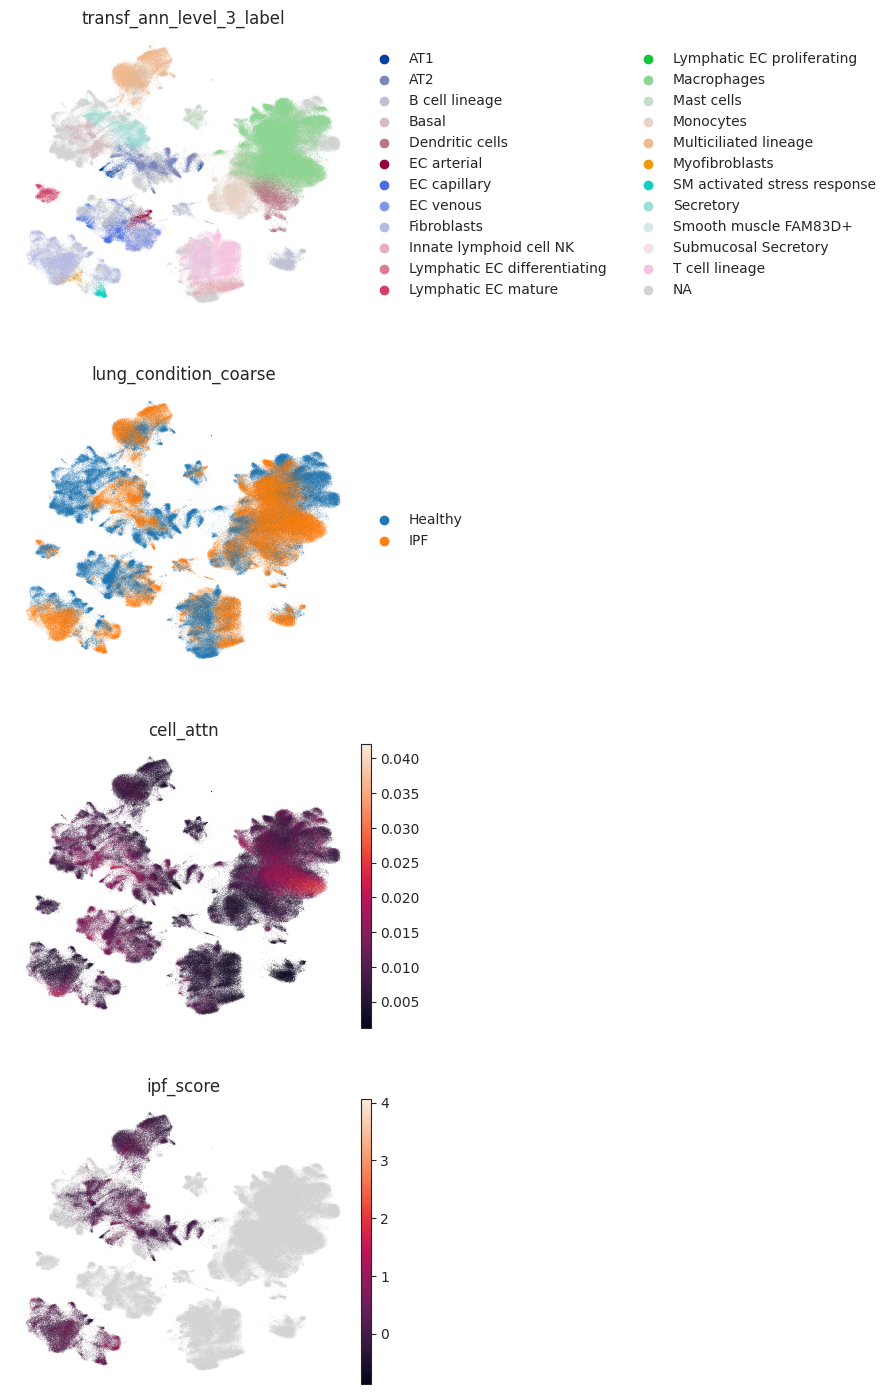

In [29]:
sc.pl.umap(
    adata,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

Alveolar epithelium, fibroblasts, club, basal

In [33]:
np.unique(adata_subset.obs['transf_ann_level_3_label'])

array(['AT1', 'AT2', 'B cell lineage', 'Basal', 'EC capillary',
       'EC venous', 'Fibroblasts', 'Lymphatic EC mature', 'Macrophages',
       'Mast cells', 'Monocytes', 'Multiciliated lineage',
       'Myofibroblasts', 'SM activated stress response', 'Secretory',
       'Smooth muscle FAM83D+', 'Submucosal Secretory', 'T cell lineage'],
      dtype=object)

# Basal

In [37]:
basal = adata[adata.obs['transf_ann_level_3_label'] == 'Basal'].copy()
basal

AnnData object with n_obs × n_vars = 11425 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


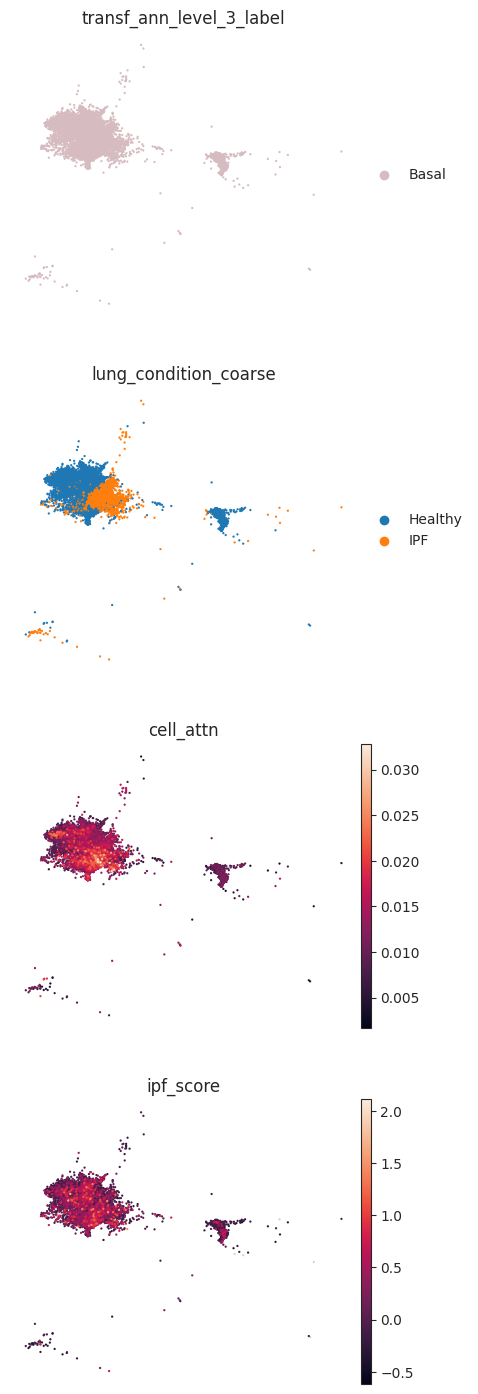

In [38]:
sc.pl.umap(
    basal,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

# Fibroblasts

In [39]:
fibro = adata[adata.obs['transf_ann_level_3_label'] == 'Fibroblasts'].copy()
fibro

AnnData object with n_obs × n_vars = 25808 × 30
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_level

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


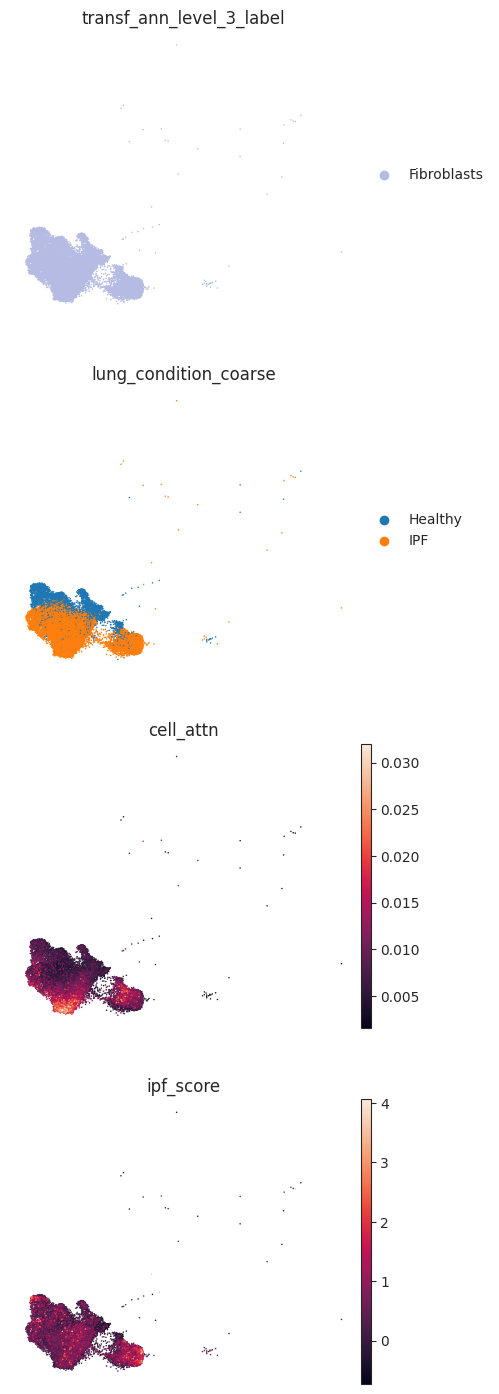

In [40]:
sc.pl.umap(
    fibro,
    color=['transf_ann_level_3_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score'],
    ncols=1,
    frameon=False
)

In [43]:
adata_subset.obsm['latent'] = adata[adata_subset.obs_names].X.copy()
adata_subset

AnnData object with n_obs × n_vars = 97570 × 2000
    obs: "3'_or_5'", 'BMI', 'age_or_mean_of_age_range', 'age_range', 'anatomical_region_ccf_score', 'ancestry', 'ann_coarse_for_GWAS_and_modeling', 'ann_finest_level', 'ann_level_1', 'ann_level_2', 'ann_level_3', 'ann_level_4', 'ann_level_5', 'assay', 'cause_of_death', 'cell_type', 'core_or_extension', 'dataset', 'development_stage', 'disease', 'donor_id', 'fresh_or_frozen', 'log10_total_counts', 'lung_condition', 'mixed_ancestry', 'original_ann_level_1', 'original_ann_level_2', 'original_ann_level_3', 'original_ann_level_4', 'original_ann_level_5', 'original_ann_nonharmonized', 'reannotation_type', 'sample', 'scanvi_label', 'sequencing_platform', 'sex', 'smoking_status', 'study', 'subject_type', 'suspension_type', 'tissue', 'tissue_coarse_unharmonized', 'tissue_detailed_unharmonized', 'tissue_dissociation_protocol', 'tissue_level_2', 'tissue_level_3', 'tissue_sampling_method', 'total_counts', 'transf_ann_level_1_label', 'transf_ann_lev

In [44]:
sc.pp.neighbors(adata_subset, use_rep='latent')

In [45]:
sc.tl.leiden(adata_subset)

In [46]:
sc.tl.umap(adata_subset)

/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/lustre/groups/ml01/workspace/anastasia.litinetskaya/mambaforge/envs/seacells/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will 

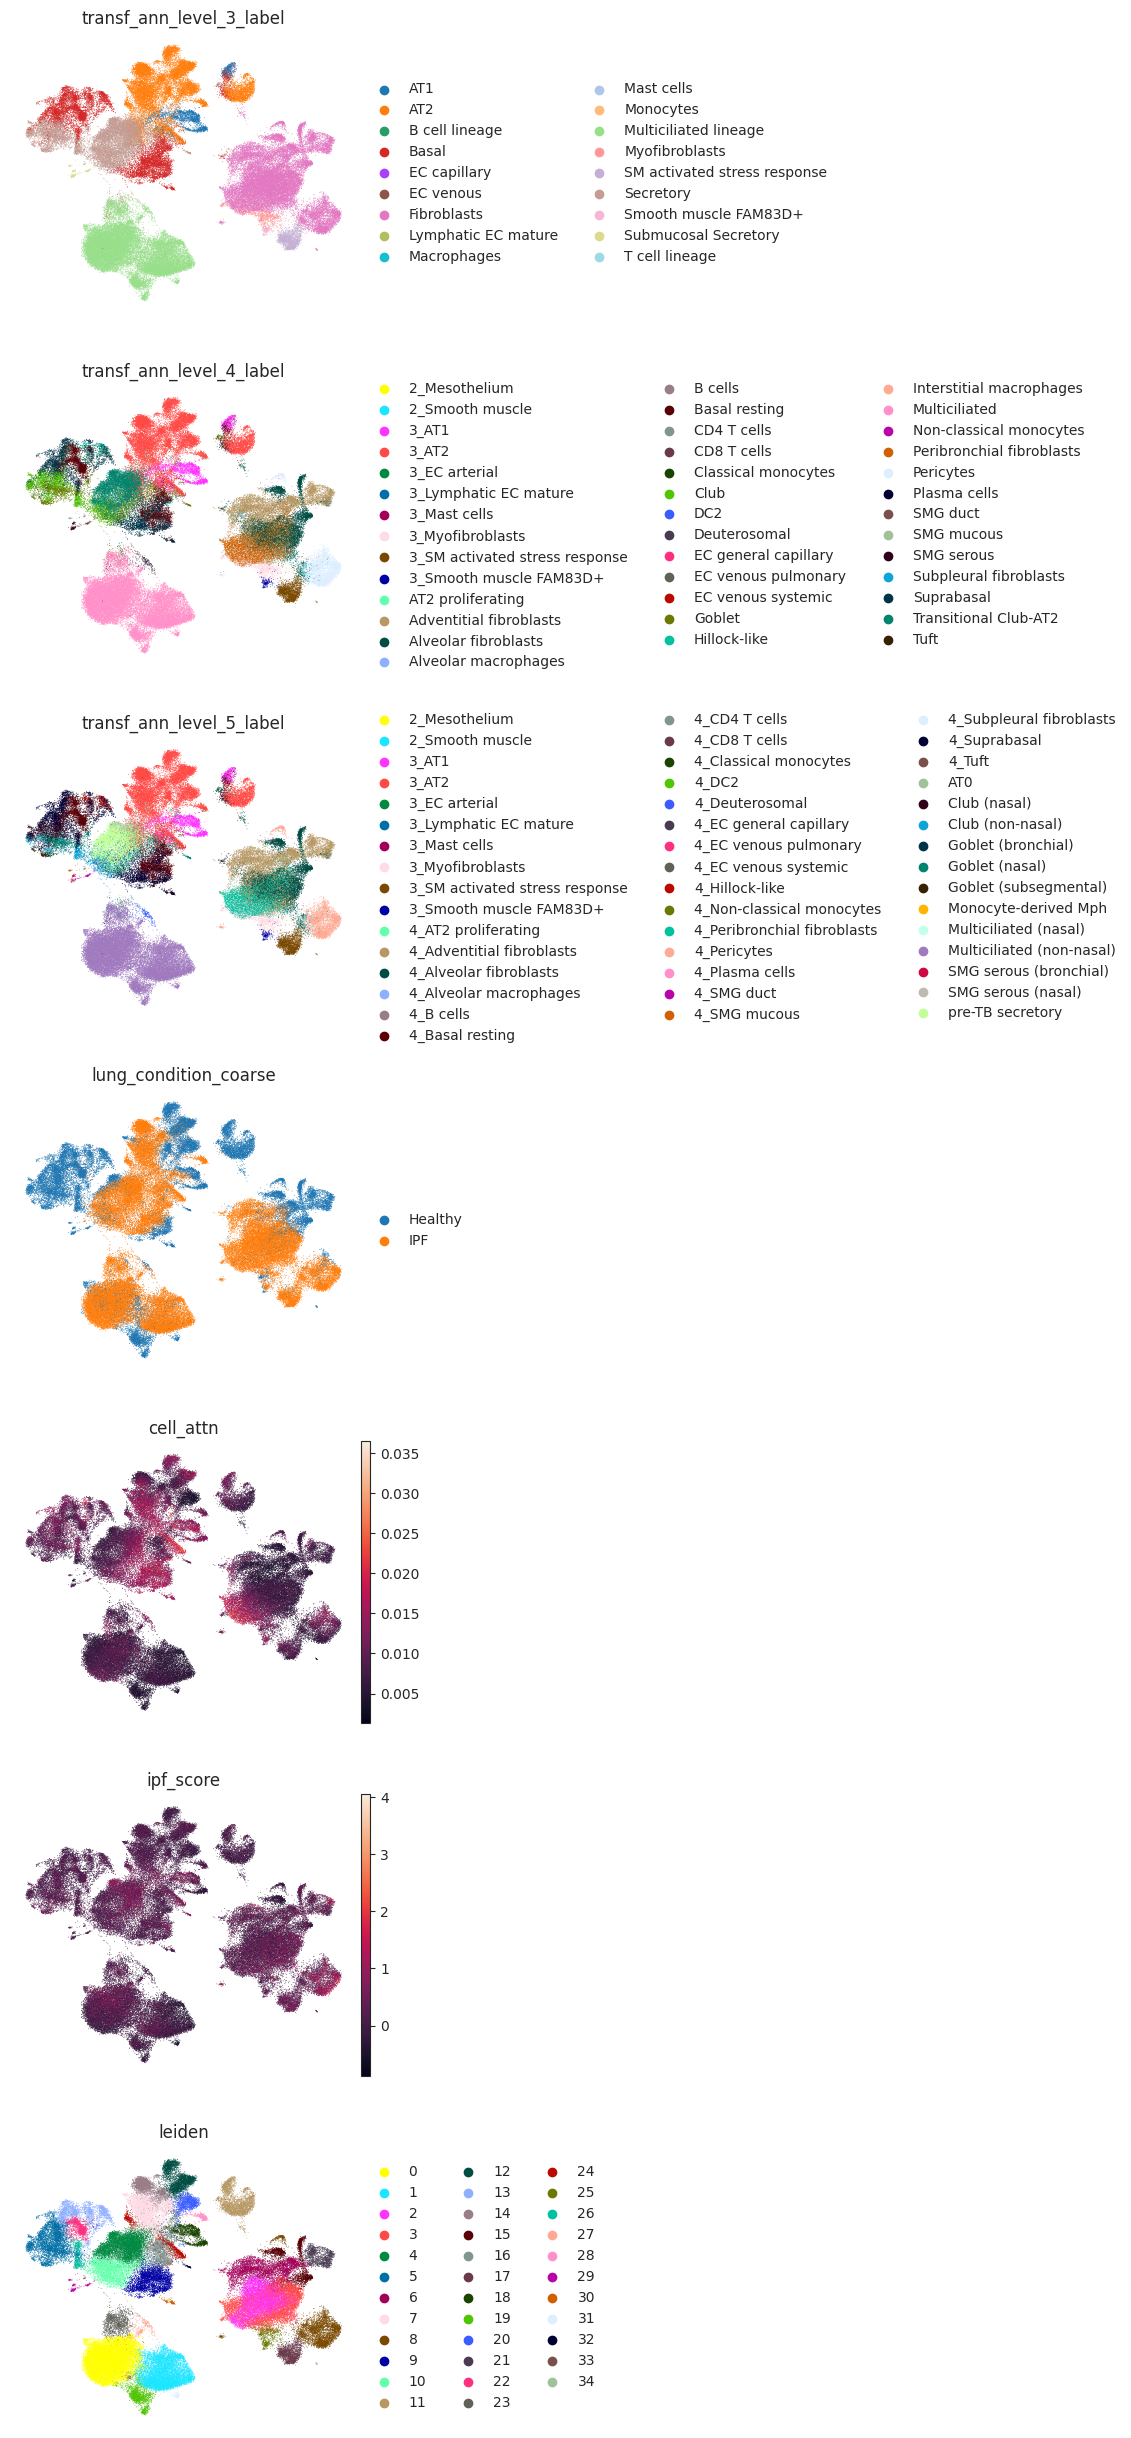

In [50]:
sc.pl.umap(
    adata_subset, 
    color=['transf_ann_level_3_label', 'transf_ann_level_4_label', 'transf_ann_level_5_label', 'lung_condition_coarse', 'cell_attn', 'ipf_score', 'leiden'],
    ncols=1,
    frameon=False,
)

In [48]:
df = adata_subset.obs[['cell_attn', 'ipf_score', 'leiden']]
df

,cell_attn,ipf_score,leiden
ILD60-2_ACGAGGAAGCCAGAAC_haberman,0.004369,-0.399237,0
ILD61-1_AGGGAGTTCCGCTGTT_haberman,0.012581,-0.245731,7
F01379_GGACGTCGTACACCGC_haberman,0.010969,-0.361455,0
ILD59-2_CCATTCGCAATGGATA_haberman,0.016203,-0.153594,7
TGGAGAGTCATGTCAG-1_DD046Q_tata_unpubl,0.009473,0.208355,9
...,...,...,...
135I-a_CCACCTAAGAAGGCCT_adams,0.007781,0.093997,10
123I_AAGGTTCGTATGCTTG_adams,0.007385,-0.518885,1
TTAACTCGTAATAGCA-WSSS8015051-0_meyer_unpubl,0.007661,-0.404430,2
QZY9VQng_TTAGGACAGCTAGGCA-1_lukassen,0.005993,-0.179310,11


<Axes: xlabel='leiden'>

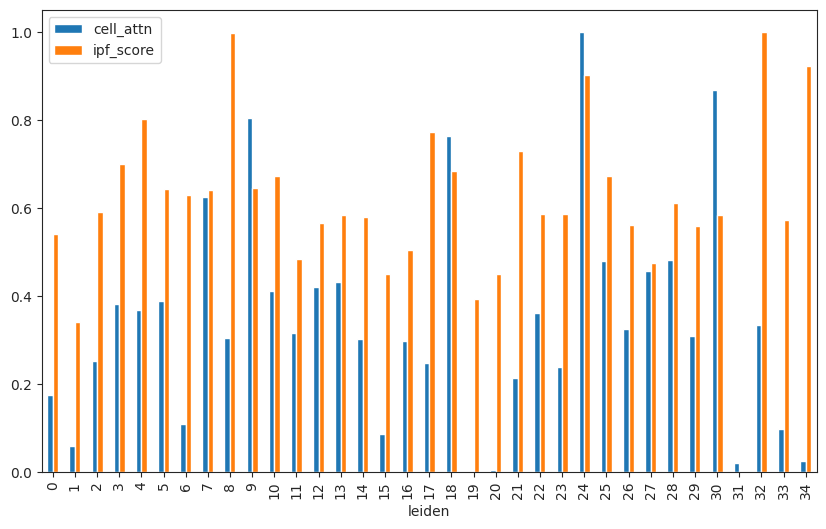

In [49]:
df_groups = df.groupby(['leiden']).agg('mean')
# min-max normalize
df_groups = (df_groups-df_groups.min())/(df_groups.max()-df_groups.min())

#create bar plot with custom aesthetics
df_groups.plot(kind='bar', figsize=(10, 6))